## Measurements og position and momentum


What exactly is it with measurements of position and momentum that can not be done? And what happens if we just go ahead and measure first position and then momentum?

An obvious way to address these questions is through experiments. So let’s set them up and examine the outcome!

**What:** We will examine the interplay between the measurements of position and momentum. In particular we will study how the measurements affect the wave function.

**Learning objective:** Obtain an understanding of how position and momentum measurements affect the wave function.

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import assemble

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

**Space and measuremnt of position:**

As in the exercise on the collapse of the  wave function we will think of the qubits as possible positions. 

Here is *a brief reminder* of how this setup works:

For simplicity let's consider a world with 3 sites, with each site represented by a qubit.  Classically we would say that the particle can be at one of the 3 positions $x_1=0$, $x_2=a$ or $x_3=2a$. In the quantum world we have to be more careful: The particle will have the wave function
\\begin{eqnarray}
\Psi(x_0,t=0) & = & c_1 \\ 
\Psi(x_1,t=0) & = & c_2 \\ 
\Psi(x_2,t=0) & = & c_3
\end{eqnarray}

with given values for the coefficients, $c_0$, $c_1$ and $c_2$. (The constant, $N=1/\sqrt{|c_1|^2+|c_2|^2+|c_3|^2}$, makes sure that the wave function is normalized.) For the particle with a given wave function we can perform a measurement of position and the probability that we detect the particle at the location $x_j$, $j=0,1,2$ is given by $|c_j|^2$.

**Confused?** If so, try to go back to the exercise on the collapse of the wave function.

To see how measurements of $x$ and $p$ affect each other let's start from the uniform wave function 


\begin{eqnarray}
\Psi(x_0,t=0) & = & \frac{1}{\sqrt{3}} \\ 
\Psi(x_1,t=0) & = & \frac{1}{\sqrt{3}} \\ 
\Psi(x_2,t=0) & = & \frac{1}{\sqrt{3}}
\end{eqnarray}


**Recall** that if we measure the momentum of a particle in this state we get 0 every time. As a first step let's check this:

First let's define the functions that allow us to set up the wave function

In [2]:
#initialising a quantum circuit. 
def initial(N,M):
    q = QuantumRegister(N) #N is th number of qubits
    c = ClassicalRegister(M) #M is the number of bits
    qc = QuantumCircuit(q,c)
    return qc


#make desired vector: 
def state(liste,qc): 
    C = np.array(liste) #len(C) is the number of states. 

    N = len(C)
    H_d = 2**N
    
    fullstate = np.zeros(H_d)
    for k in range(N):
        fullstate[(1 << k) ]+=C[k]
        
    norm = np.linalg.norm(fullstate)
    fullstate = fullstate/norm
    return qc.initialize(fullstate.tolist(), qc.qubits)


... and the transformation that allow us to measure the momentum

In [3]:
def x_to_p(N):#N is the number of qubits in our psi state. 
    
    H_d = 2**N

    U = np.diag(np.ones(H_d)).tolist()

    x = np.arange(N)
    p = np.arange(N)

    for i in range(N):
        index_i = 1 << i #1 bitshifted by i - picks up our pure states
        for j in range(N):
            index_j = 1 << j
            arg = 2 * p[j] * (x[i]-1) * np.pi/N
            U[index_i][index_j] = 1/np.sqrt(N) * np.exp(arg*1j)
    return U

Now let's set up the experiment to measure the momentum in the uniform state

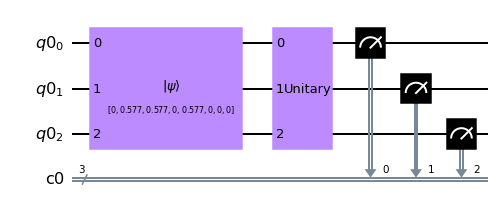

In [4]:
N=3
qc0 = initial(N,N)

state([1,1,1],qc0)
qc0.unitary(x_to_p(3),qc0.qubits)
qc0.measure(0,0)
qc0.measure(1,1)
qc0.measure(2,2)

qc0.draw()

... and finally measure the momentum (we repeat the experiment 10 times)

In [5]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc0, shots=10, memory=True).result()
memory = result.get_memory(qc0)
y = ()
for i in range(N):   
    element = "0"*(N-1-i)+"1"+"0"*i
    y = y + (element,) 
y = tuple(y)
for x in memory:
    momentum = y.index(x)
    print("Measured momentum,", momentum-1,"hbar/a") 
    print()

Measured momentum, 0 hbar/a

Measured momentum, 0 hbar/a

Measured momentum, 0 hbar/a

Measured momentum, 0 hbar/a

Measured momentum, 0 hbar/a

Measured momentum, 0 hbar/a

Measured momentum, 0 hbar/a

Measured momentum, 0 hbar/a

Measured momentum, 0 hbar/a

Measured momentum, 0 hbar/a



**This far:** We have reminded ourselves that if we measure the momentum of a particle in a uniform state we get momentum zero.

**But what is it about measurements of position and momentum?**

To understand better how measurements of position and momentum affect one another, let's start from again from the uniform wave function 

\begin{eqnarray}
\Psi(x_0,t=0) & = & \frac{1}{\sqrt{3}} \\ 
\Psi(x_1,t=0) & = & \frac{1}{\sqrt{3}} \\ 
\Psi(x_2,t=0) & = & \frac{1}{\sqrt{3}}
\end{eqnarray}


and now let's first measure the position and subsequently the momentum.

If we did **not** measure the position first we just saw that we would get $p=0$. The question is if this remains true when we now measure the position before we measure the momentum. Let's check:


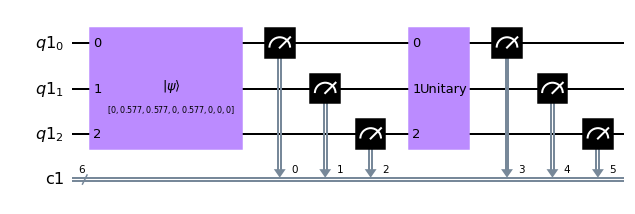

In [7]:
N=3
qc0 = initial(N,2*N)

state([1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)],qc0)
qc0.measure(0,0)
qc0.measure(1,1)
qc0.measure(2,2)
qc0.unitary(x_to_p(3),qc0.qubits)
qc0.measure(0,3)
qc0.measure(1,4)
qc0.measure(2,5)

qc0.draw()

**How to read the diagram:** The leftmost purple square, labeled $|\psi\rangle$, sets up the uniform wave function and the subsequent gauges measures the position. The rightmost purple square, labled unitary, then tranforms the gauges into momentum gauges and we finally measure the momentum.

Let's give it a try!

In [9]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc0, shots=1, memory=True).result()
memory = result.get_memory(qc0)
y = ()
for i in range(N):
    for j in range(N):
        element = "0"*(N-1-i)+"1"+"0"*i+"0"*(N-1-j)+"1"+"0"*j
        y = y + (element,) 
y = tuple(y)
for x in memory:
    number= y.index(x)
    for i in range(N):
        for j in range(N):
            if number == i*N+j:
                print("Detected position,", j,"a") 
                print()
                print("Measured momentum,", i-1,"hbar/a") 
                print()

Detected position, 1 a

Measured momentum, 1 hbar/a



**Check:** Run the experiment a few times and check that the outcome of the position measurements gives the result you expect for the uniform wave function. 

**Exercise 5:** What is the wave function right after we have measured the position and detected the particle at position, say, 2a?

**Recall:** As we have 3 possible positions we also have 3 possible momenta $-\hbar/a$, $0$ and $\hbar/a$.

When you  ran the experiment you probably noticed that all of the 3 possible values of the momentum are obtained even though the initial wave function is uniform.

**Exercise 6:** Use the result from exercise 5 to explain why we do not always get momentum 0 if we first measure the position.


**Don't miss:** Note that we have just measured the position and then the momentum. For each of our experiments the result is a detection of the particle at a given position and then a result for the momentum. So we can measure the position and then the momentum. However, as we have also seen the measurement of position affects the measurement of the momentum. Without the measurement of the position the measurement of momentum would have given $p=0$ since we start in the uniform wave function (as we checked above).

To understand the interplay between the measurements of position and momentum better let's also try to do the measurement of the momentum first and then measure the position.

This time let's start from the localized state 


\begin{eqnarray}
\Psi(x_0,t=0) & = & 1 \\ 
\Psi(x_1,t=0) & = & 0 \\ 
\Psi(x_2,t=0) & = & 0
\end{eqnarray}


Here we go!

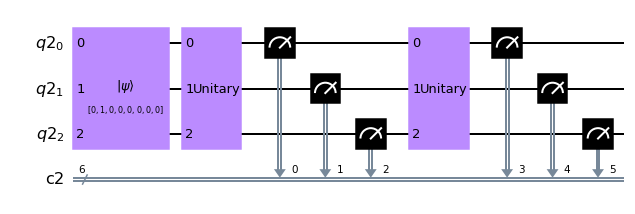

In [10]:
N=3
qc0 = initial(N,2*N)

state([1,0,0],qc0)
qc0.unitary(x_to_p(3),qc0.qubits)
qc0.measure(0,0)
qc0.measure(1,1)
qc0.measure(2,2)
qc0.unitary(np.transpose(x_to_p(3)),qc0.qubits)
qc0.measure(0,3)
qc0.measure(1,4)
qc0.measure(2,5)

qc0.draw()

**How to read the diagram:** First we set up the wave function, then we transform to momentum gauges and do the measurement of momentum. In order finally to measure the position, we transform back to position gauges and do the measurement of position. 

In [11]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc0, shots=1, memory=True).result()
memory = result.get_memory(qc0)
y = ()
for i in range(N):
    for j in range(N):
        element = "0"*(N-1-i)+"1"+"0"*i+"0"*(N-1-j)+"1"+"0"*j
        y = y + (element,) 
y = tuple(y)
for x in memory:
    number= y.index(x)
    for i in range(N):
        for j in range(N):
            if number == i*N+j:
                print("Measured momentum,", j-1,"hbar/a") 
                print()
                print("Detected position,", i,"a") 
                print()

Measured momentum, -1 hbar/a

Detected position, 2 a



**Exercise 7:** What would the outcome of the position measurement have been if we had not measured the momentum before we measured the position? Run the experiment a handfuld of times to see how the measurement of momentum has changed this.

**Note:** When we measure position the wave function collapses to a wave function localized at the position where the particle was detected. In a analogous way when we measure the momentum the wave function collapses to a wave function with the definite momentum we have just measured. Hence the measurement of momentum affects the subsequent measurement of position.

**What is it that we can not do?** 

We have seen that it is possible to measure first the position and then the momentum (or vise versa). If we do so we will get a position where the particle was detected and a value for the momenta. So what is it that we can not do?

The answer is that it is not possible to measure the position and the momentum without affecting the wave function. Even if we start with a localized state and measure the position first (such that we know the answer in advance and such that the measurement of position does not alter the state) then the measurement of momentum will alter the state. 

**Take home:** We have seen that it is possible to measure first the position and then the momentum (or vise versa). If we do so we will get a position where the particle was detected and a measured value for the momenta. However, the two measurements will change the wave function. 